# PROJECT 2: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. ‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital.‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

**Questions to answer:**

- <a href="#research1">What is the information on the youngest male patient? How about the youngest female patient? </a>
- <a href="#research2">Which gender has the highest frequency of hypertension, diabetes, alcoholism and handicaps?</a>
- <a href="#research3">In what neighborhoods are appointments most frequently scheduled? What are the least frequently scheduled neighborhoods?</a>
- <a href="#research4">What is the distribution of diseases?</a>
- <a href="#research5">What is the possible relationship between no-show appointments and gender?</a>
- <a href="#research6">What is the possible relationship between no-show appointments and appointment day?</a>
- <a href="#research7">What is the possible relationship between no-show appointments and age?</a>
- <a href="#research8">What is the possible relationship between no-show appointments and neighborhood?</a>
- <a href="#research9">What is the possible relationship between no-show appointments and scholarship status?</a>
- <a href="#research10">What is the possible relationship between no-show appointments and having received SMS notification?</a>

In [2]:
#importing modules that will be used as well as the read in the CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import calendar

from pandas import Series, DataFrame

df = pd.read_csv('noshow.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [337]:
#Review the columns and first five rows of the dataFrame 

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [338]:
#Review data types and look for any missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [339]:
#Review dataFrame for any duplicates

sum(df.duplicated())

0

In [340]:
df.shape

(110527, 14)

In [341]:
#Generate descriptive statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [342]:
#Change the first letter of column names from uppercase to lowercase for analytical convenience

df.rename(columns = lambda x: x.lower(), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [343]:
#Change selected column names to ones that are clearer and easier to use

df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 
                        'appointmentday':'appointment_day','hipertension':'hypertension', 'handcap':'handicap',
                       'no-show':'no_show', 'neighbourhood':'neighborhood'}, inplace=True)

#Show changes
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [344]:
#Change the Scheduled Day column from string to a timestamp

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

#Check if the data type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


In [345]:
#Change the Appointment Day column from string to a timestamp and fix datetime format

df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'].dt.date)

#Show changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

<a id='research1'></a>
### Research Question 1: What is the information on the youngest male patient? How about the youngest female patient?

In [346]:
#Used idxmin and groupby to identify the indexes of the oldest male & female patients
df.groupby('gender').idxmin()

,patient_id,appointment_id,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
gender,,,,,,,,,,,
F,100517,3764,3764,0,99832,0,2,0,0,0,0
M,105430,46292,46292,1,63,1,1,1,1,1,1


In [347]:
#Accessing information on the youngest female patient using .iloc
df.iloc[99832]

patient_id                       4.65943e+14
appointment_id                       5775010
gender                                     F
scheduled_day      2016-06-06 08:58:13+00:00
appointment_day          2016-06-06 00:00:00
age                                       -1
neighborhood                           ROMÃO
scholarship                                0
hypertension                               0
diabetes                                   0
alcoholism                                 0
handicap                                   0
sms_received                               0
no_show                                   No
Name: 99832, dtype: object

In [348]:
#Age -1 is incorrect. Drop -1
df.drop(df.index[[99832]], inplace = True)

In [349]:
#Check for changes
df.groupby('gender').idxmin()

,patient_id,appointment_id,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
gender,,,,,,,,,,,
F,100517,3764,3764,0,59,0,2,0,0,0,0
M,105430,46292,46292,1,63,1,1,1,1,1,1


In [350]:
#Accessing information on the NEW youngest female patient using .iloc
df.iloc[3764]

patient_id                       8.32256e+14
appointment_id                       5030230
gender                                     F
scheduled_day      2015-11-10 07:13:56+00:00
appointment_day          2016-05-04 00:00:00
age                                       51
neighborhood                     RESISTÊNCIA
scholarship                                0
hypertension                               0
diabetes                                   0
alcoholism                                 0
handicap                                   0
sms_received                               1
no_show                                   No
Name: 3764, dtype: object

> The youngest female patient is 51 years old, and has no diagnosed diseases.

In [351]:
#Accessing information on the youngest male patient using .iloc
df.iloc[46292]

patient_id                       9.16375e+13
appointment_id                       5122866
gender                                     M
scheduled_day      2015-12-03 08:17:28+00:00
appointment_day          2016-05-02 00:00:00
age                                       34
neighborhood                      VILA RUBIM
scholarship                                0
hypertension                               1
diabetes                                   0
alcoholism                                 0
handicap                                   0
sms_received                               1
no_show                                  Yes
Name: 46292, dtype: object

> The youngest male patient is 34 years old and has been diagnosed with hypertension.

<a id='research2'></a>
### Research Question 2: Which gender has the highest frequency of hypertension, diabetes, alcoholism and handicaps?

Text(0, 0.5, 'Number of Hypertension Incidences')

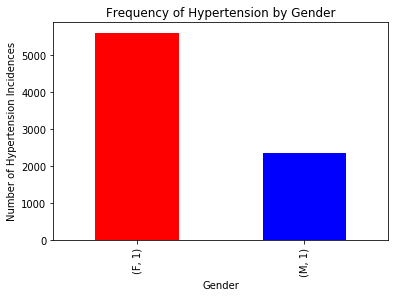

In [352]:
#Create a new dataframe for patients with hypertension
with_dia = df.query('diabetes == 1')

#Determine value count of diabetes by gender
htn_count = with_dia.groupby('gender')['diabetes'].value_counts()

#Plot diabetes value counts
htn_count.plot(kind='bar',title='Frequency of Hypertension by Gender',color=['red','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Hypertension Incidences')

> According to the data, females have the highest frequency of hypertension.

Text(0, 0.5, 'Number of Diabetes Incidences')

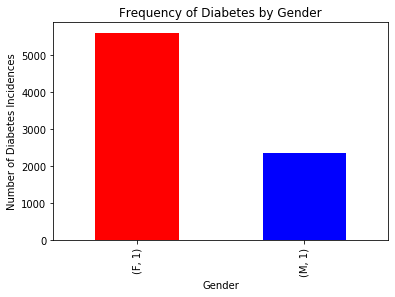

In [353]:
#Create a new dataframe for patients with diabetes
with_dia = df.query('diabetes == 1')

#Determine value count of diabetes by gender
dia_count = with_dia.groupby('gender')['diabetes'].value_counts()

#Plot diabetes value counts
dia_count.plot(kind='bar',title='Frequency of Diabetes by Gender',color=['red','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Diabetes Incidences')

> According to the data, females have the most incidences of diabetes compared to males.

Text(0, 0.5, 'Number of Alcoholism Indicences')

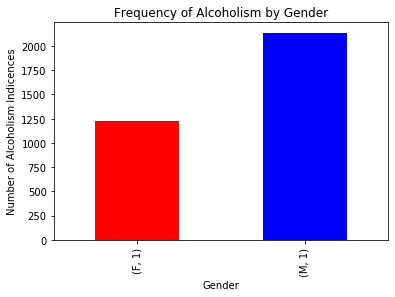

In [354]:
#Create a new dataframe for patients with alcoholism
with_alc = df.query('alcoholism == 1')

#Determine value count of alcholism by gender
alc_count = with_alc.groupby('gender')['alcoholism'].value_counts()

#Plot alcoholism value counts
alc_count.plot(kind='bar',title='Frequency of Alcoholism by Gender',color=['red','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Alcoholism Indicences')

> According to the data, males have the highest frequency of alcoholism in stark contrast to females.

Text(0, 0.5, 'Number of Handicap Incidences')

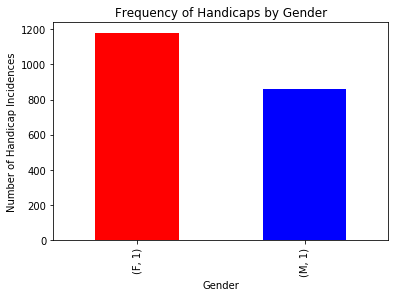

In [355]:
#Create a new dataframe for patients with handicaps
with_hand = df.query('handicap == 1')

#Determine value count of handicaps by gender
hand_count = with_hand.groupby('gender')['handicap'].value_counts()

#Plot handicap value counts
hand_count.plot(kind='bar',title='Frequency of Handicaps by Gender',color=['red','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Handicap Incidences')

> According to the data, there is a higher number of female handicapped patients than there are males.

<a id='research3'></a>
### Research Question 3: In what neighborhoods are appointments most frequently scheduled? What are the least frequently scheduled neighborhoods?

Text(0, 0.5, 'Neighborhoods')

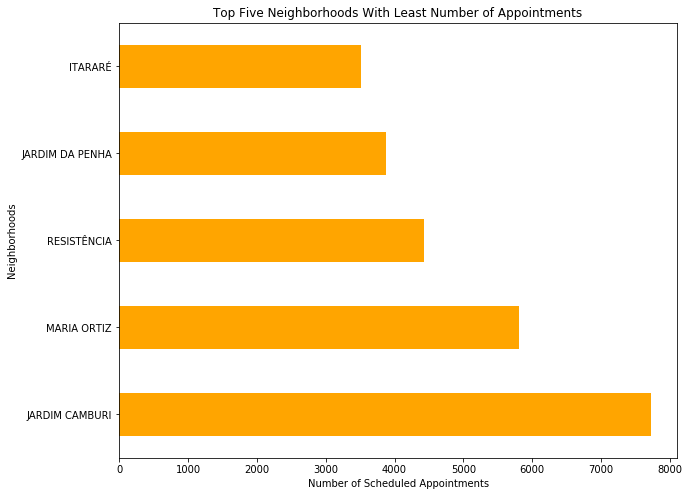

In [356]:
#Used indexing and value_counts to figure out the top five neighborhoods that are most frequently scheduled
#Create bar graph for visualization

head = df['neighborhood'].value_counts().head()

head.plot(kind='barh',color='orange', figsize=(10,8))
plt.title('Top Five Neighborhoods With Least Number of Appointments')
plt.xlabel('Number of Scheduled Appointments')
plt.ylabel('Neighborhoods')


Text(0, 0.5, 'Neighborhoods')

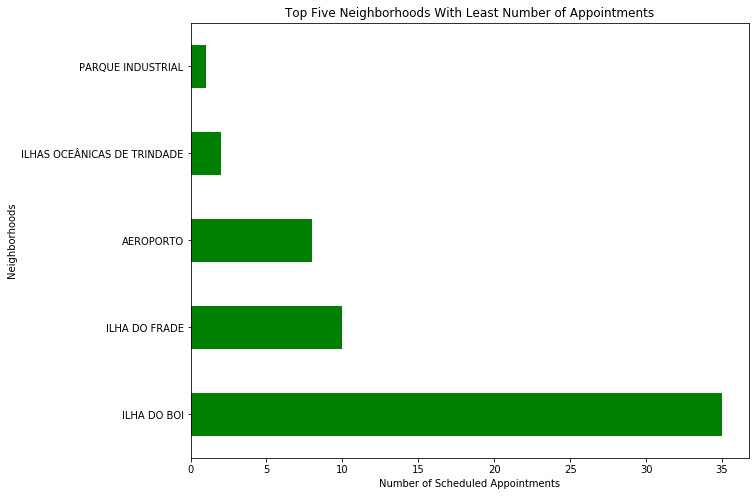

In [357]:
#Used indexing and value_counts to figure out the top five neighborhoods that are least frequently scheduled
#Create bar graph for visualization

tail = df['neighborhood'].value_counts().tail()
    
tail.plot(kind='barh',color='green', figsize=(10,8))
plt.title('Top Five Neighborhoods With Least Number of Appointments')
plt.xlabel('Number of Scheduled Appointments')
plt.ylabel('Neighborhoods')

> According to the data, the top five locations of the hospital where appointments are most frequently scheduled are JARDIM CAMBURI, MARIA ORTIZ, RESISTENCIA, JARDIM DE PENHA & ITARARE. Meanwhile, the least frequently scheduled locations are PARQUE INDUSTRIAL, ILHAS OCEANICAS DE TRINDADE, AEROPORTO, ILHA DO FRADE & ILHA DO BOI.

<a id='research4'></a>
### Research Question 4: What is the distribution of diseases?

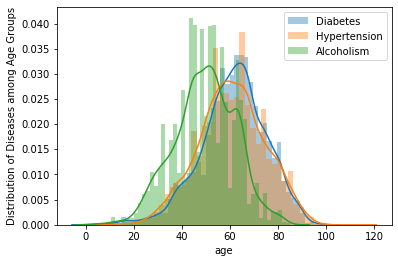

In [382]:
dia_age = df.query('diabetes == 1').age
alc_age = df.query('alcoholism == 1').age
htn_age = df.query('hypertension == 1').age

bins = [20,40,60,80,100,120]

sns.distplot(dia_age, bins=50, label='Diabetes')
sns.distplot(htn_age, bins=50,label='Hypertension')
sns.distplot(alc_age, bins=50,label='Alcoholism')
plt.ylabel('Distribution of Diseases among Age Groups')
plt.legend()
plt.show()

> Patients in their 20-40s see a marked increase in cases of alcoholism. Although it declines by 60, it doesn't quite decrease down to the prior rate. Meanwhile, both diabetes and hypertension see a massive upsurge in mid-40s to 60s.

<a id='research5'></a>
### Research Question 5: What is the possible relationship between no-show appointment and appointment day?

In [359]:
#Create mask for no shows & those who showed up
showed_up = df['no_show'] == 0
not_showed = df['no_show'] == 1
df['showed_up'] = showed_up
df['not_showed'] = not_showed

In [360]:
#Create a new column containing the appointment's day of the week for data analysis

df['day_of_week'] = df['appointment_day'].dt.weekday_name

In [361]:
#Create new dataFrames for patients who showed up and did not show up for convenience
not_show = df.query('no_show == "Yes"')
showed_up = df.query('no_show == "No"')

Text(0.5, 1.0, 'Trend of No Shows and Total Number of Appointments through the Days of the Week')

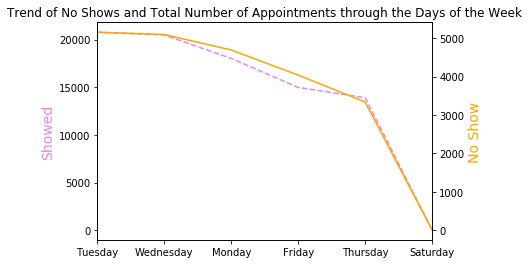

In [386]:
appt_showed = showed_up['day_of_week'].value_counts()
appt_noshow = not_show['day_of_week'].value_counts()

fig, ax = plt.subplots()
ax2 = ax.twinx()
opacity=0.5

appt_showed.plot(ax=ax, color='violet',ls='--')
appt_noshow.plot(ax=ax2, color='orange')
ax2.legend().set_visible(False)
ax.legend().set_visible(False)
ax2.set_ylabel('No Show',color='orange',fontsize=14)
ax.set_ylabel('Showed',color='violet', fontsize=14)
plt.title('Trend of No Shows and Total Number of Appointments through the Days of the Week')

> The data indicates that there is an increase of no shows around Mondays and Fridays, but the trend is more or less the same for patients who showed versus those who did not show through the days of the week.

<a id='research6'></a>
### Research Question 6: What is the possible relationship between no-show appointment and gender?

In [363]:
#Obtain total number of appointments grouped by gender

df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [364]:
#Determine number of those who showed up to their appointments
gender_count = not_show['gender'].value_counts()
gender_count

F    14594
M     7725
Name: gender, dtype: int64

In [365]:
#Determine percentage
percentage = (gender_count/df['gender'].value_counts())*100
percentage

F    20.314871
M    19.967948
Name: gender, dtype: float64

 > According to the data, there appears to be very little difference between males and females in the frequency of no shows. While patients listed as Females have the highest frequency in missing their appointments by 20.3% or 14,594 out of 71,840 total female-made appointments, males were not far behind at 19.9% or 7,725 out of 38,687 total male-made appointments.

<a id='research7'></a>
### Research Question 7: What is the possible relationship between no-show appointment and age?

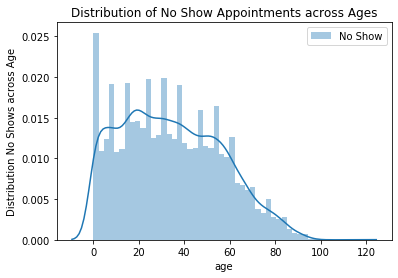

In [366]:
noshow_age = df.query('no_show == "Yes"').age
total = df.age

sns.distplot(noshow_age, bins=, label='No Show')
plt.ylabel('Distribution No Shows across Age')
plt.legend()
plt.title('Distribution of No Show Appointments across Ages')
plt.show()

Text(0.5, 1.0, 'Average Age for Appointment Status')

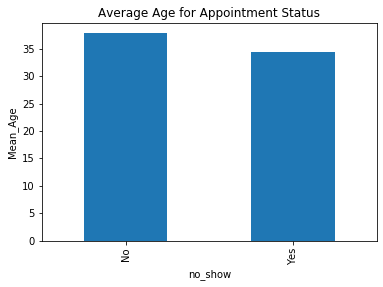

In [367]:
#Calculate average age for no shows vs. those who showed up
df.groupby('no_show')['age'].mean().plot.bar()
plt.ylabel('Mean_Age')
plt.title('Average Age for Appointment Status')

> According to the data, no shows are higher in ages 16 to 42 years old but has an abrupt decline starting at 42 years old onwards. The average age for no shows are lower.

<a id='research8'></a>
### Research Question 8: What is the possible relationship between no-show appointment and neighborhood?

In [368]:
#Determine number of those who showed up to their appointments
neighb_count = not_show['neighborhood'].value_counts()
neighb_count

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighborhood, Length: 80, dtype: int64

Text(0, 0.5, 'Neighborhoods')

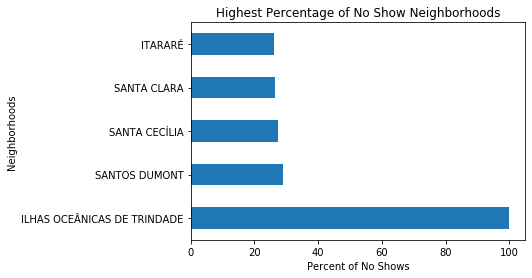

In [369]:
#Determine percentage of highest percent of no shows per neighborhood
percentage = (neighb_count/df['neighborhood'].value_counts())*100

#Plot
percentage.sort_values(ascending=False).head().plot.barh()
plt.title('Highest Percentage of No Show Neighborhoods')
plt.xlabel('Percent of No Shows')
plt.ylabel('Neighborhoods')

Text(0, 0.5, 'Neighborhoods')

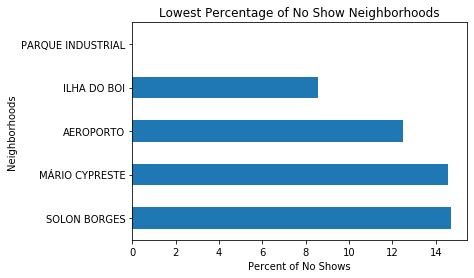

In [370]:
#Determine percentage of no shows per neighborhood
neigh_perc = (neighb_count/df['neighborhood'].value_counts())*100

#Plot
neigh_perc.sort_values(ascending=False).tail().plot.barh()
plt.title('Lowest Percentage of No Show Neighborhoods')
plt.xlabel('Percent of No Shows')
plt.ylabel('Neighborhoods')

> According to the data, some neighborhooods have a higher percentage of no shows than others.

<a id='research9'></a>
### Research Question 9: What is the possible relationship between no-show appointment and scholarship status?

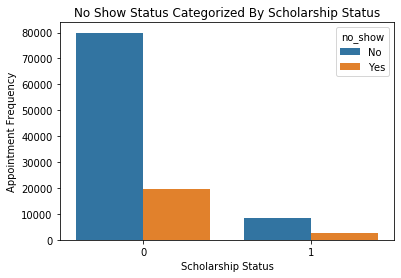

In [379]:
#Use sns countplot to count number of no shows and plot
appt_scholarship = sns.countplot(x = 'scholarship', hue = 'no_show', data = df)
appt_scholarship.set_title('No Show Status Categorized By Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Appointment Frequency')
plt.show()

> According to the data, with  there are fewer no shows for people enrolled in the welfare program compared to those who are not enrolled in the program.

<a id='research10'></a>
### Research Question 10: What is the possible relationship between no-show appointment and SMS notification received?

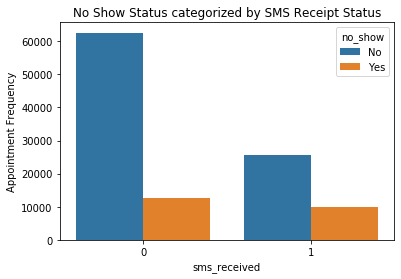

In [380]:
#Use sns countplot to count number of no shows and plot
appt_sms = sns.countplot(x = 'sms_received', hue = 'no_show', data = df)
appt_sms.set_title('No Show Status categorized by SMS Receipt Status')
plt.xlabel('sms_received')
plt.ylabel('Appointment Frequency')
plt.show()

> According to the data, with  there are fewer no shows for patients who did not receive a SMS notification in comparison to those who received a SMS notification.

<a id='conclusions'></a>
## Conclusions

- With the exception of alcoholism, females have the highest incidences of diseases in comparison to the males.
- Tuesday has the highest number of appointments scheduled.
- There are hospitals that are more frequently scheduled with than others.
- Cases of alcoholism increase starting at early 20s while diabetes and hypertension do not increase until early 40s.
- There is a slight uptick of no shows on Mondays and Thursdays, but the trend is more or less the same throughout the days of the week.
- Younger people have a higher incidence of no shows than their older counterparts.
- Some neighborhoods have a higher incidence of no shows than others.
- There are fewer no shows for patients who are enrolled in the welfare program.
- There are fewer no shows for patients who did not receive a SMS notification.

In [387]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

### Citations:

[Data Science Made Simple: Get Day of Week](http://www.datasciencemadesimple.com/get-day-of-week-pandas-python-2/)

[Scentellegher Github](https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html)

[Stack Overflow: Plot Countplot For Two or More Column on a Single Plot](https://stackoverflow.com/questions/46223224/matplotlib-plot-countplot-for-two-or-more-column-on-single-plot)

[Kanoki: Dataframe Visualization with Pandas](https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/)

[Matplotlib Documentation: Bar Chart](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)

[Pandas Documentation: Series Plot Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html)